# Notebook for basics of OpenCV


In [1]:
import numpy as np
import cv2  #opencv library

# Opening and viewing an Image

In [13]:
img = cv2.imread("./py.jpg")

## What is an image on a computer?
--An image is basically a 2D matrix that has numeric values from 0-255 (0 being dark and 255 being bright) representing on pixel.
<br><br>
--The values determine the intensity of the color of that pixel.
<br><br>
--The color is determined by the color format. A grayscale image is a single 2D matrix where the values indicate the intensity of white. Whereas an RGB image is basically 3 x 2D metrices where values in each are the intensities of Red,Green and Blue colors respectively.
### Note: To display the image, knowing the order of matrices is essential.

In [3]:
print(img[0])  #The 'red' matrix of the imported image

[[238 238 238]
 [238 238 238]
 [238 238 238]
 ..., 
 [238 238 238]
 [238 238 238]
 [238 238 238]]


# Displaying the images

In [4]:
cv2.imshow('window name', img) #cv2.imshow("Name you want for the displaying window", image_to_display)
cv2.waitKey() #This function just waits for any key input from the user
cv2.destroyAllWindows() #This will destroy the image window

##See what happens without the waitKey and destroyAllWindows function calls

# Format
OpenCV2 follows different conventions from other image libraries like PIL. The most important one is that the image is opened in BGR color format instead of RGB. Trying to display a BGR image in RGB format will result in an image with wierd looking color.

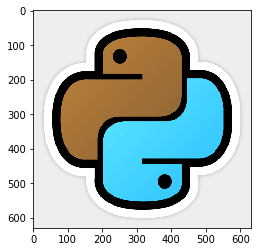

In [5]:
#Ignore this bit code.....just proving a point here
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()
###BGR image displayed with RGB format......doesnt look quite right, does it?

# Image geometry
### Notice something unusual about the co-ordinates of the image above.
<br>
Unlike the usual X and Y axis that we have been seeing throughout the course of our existence, here the origin is at the top left corner. Keep this in mind for any image operation.

# Resizing the image
The resolution of an image is basically the number of rows and columns that are present in the matrix.

In [6]:
img_resized = cv2.resize(img,(24,24))# (Image,(height, width))
cv2.imshow("Resized image",img_resized)
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
#Display your image

## Flippin an image

In [8]:
new_img = cv2.flip(img, 0)   #to flip your image...try 1 and -1 inplace of zero and display all 3

In [9]:
#Try displaying the new image here

## Saving your image

In [ ]:
cv2.imwrite("address in your pc", new_img) #cv2.imwrite("location", image)

#imwrite --- image write

## Changing the color scheme of the images
#### Like we discussed before, 
images are loaded in the BGR format. But with different operations, comes the need to use different (and somewhat weird-looking) color schemes. And in OpenCV, there are a lot.....
<br>
<br>
---To get an idea, for the cell bellow, do not execute it, just hit the TAB key...

In [ ]:
cv2.COLOR_

So, for converting the color......

In [24]:
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) ##The function takes the color scheme on the right and applies it to the image on the left

In [25]:
# Display the grayscaled image here
#Also, try the BGR2HSV scheme

## Image slicing and Region of Interest

In some cases, we just need to focus on a specific region rather than the entire image....which becomes a lot easier when we realize the fact the image is but a mere matrix.
<br><br>
So........

In [18]:
image_slice = img[100:450,200:350] #some random range

cv2.imshow("Not the entier image",image_slice)
cv2.waitKey()
cv2.destroyAllWindows()

### Super important note:
Do NOT forget the co-ordinate system stuff here,
<br><br>
If you need to cut a rectangel from point (x,y) (of normal co-ordinate system) of height h and width w, the correct co-ordinates will be <b>[y:y+h , x:x+w]</b> instead of <b>[x:x+w , y:y+h]</b>. 

# Drawing and writing on the images
lets start by creating a blank image.....

In [42]:
blank_img = np.zeros(shape=(512,512,3), dtype=np.uint8) #creating an image with pixel values 0


In [43]:
cv2.imshow("Blank",blank_img)
cv2.waitKey()
cv2.destroyAllWindows()

## Drawing Shapes

OpenCV2 has functions makes drawing shapes as easy as it gets in a programming language.
<br><br>
Let us start with a simple rectangle. For the funtion we need the top left and the bottom right co-ordinates, the color scheme (in BGR) and the line thickness (because why not.....).
<br>
#### And do not forget that co-ordinate system blunder here

In [44]:
#Rectangle

art = cv2.rectangle(blank_img, (55,75), (510, 125), (0,255,0), 5)

#cv2.rectangle(image, top_left_point, bottom_right_point, rgb_color, thickness)

In [45]:
# Lets look at are masterpiece shall we.....
cv2.imshow("Masterpiece",art)
cv2.waitKey()
cv2.destroyAllWindows()

### Note:
The shape functions does 2 things at the same time. It returns the image with the drawn shape AND modifies the original image as well.
<br><br>
Now for a jupyter notebook trick, if you write the name of a function and hit Shift + Tab, it will show you the required arguments along with the docstring/description of the function (if the developer has taken the efforts to write them).
<br><br>
So, in the next cell, check the function 'cv2.circle' and fill in the arguments to put a ring on it. Also, try this for a line.

## Text
Just as simple as the shapes part....

In [ ]:
font = cv2.FONT_HERSHEY_COMPLEX  #Explore other fonts too, by cv2.FONT then tab

cv2.putText(blank_img,text='Hello',org=(10,500), fontFace=font,fontScale= 4,color=(255,255,255),thickness=2)

#Display your name on screen

# Arethmetic and Logical operations on the images
....
<br><br><br>
P.S.: It is not as scary as it sounds.

In [46]:
##Lets import 2 images of some graphs that does not mean anything in this context
img1 = cv2.imread('op1.png')
img2 = cv2.imread('op2.png')
#Plis look at the images before moving ahead.....

In [47]:
#Lets start with the basics......Addition
img_sum = img1 + img2
cv2.imshow("Sum",img_sum)
cv2.waitKey()
cv2.destroyAllWindows()

### So....what just happened...
The '+' operator basically super-imposed the images. <br>That's it. <br>Nothing too special here.
##### But.....

In [48]:
img_sum = cv2.add(img1,img2)
cv2.imshow("Sum",img_sum)
cv2.waitKey()
cv2.destroyAllWindows()

## What happened up there.....
The add function works differently. Rather than superimposing the images, it added their pixel values. 
<br><br>
So if the pixel value at a point of img1 is 127 and for img2 is 112, in the resultant image will have the pixel value equal to  whatever 127+112 is.....
<br><br>
Now remember, 255 is "white" for any color matrix of BGR. Therefore when the 2 images are added with .add(), most of the pixel values are near 255 and therefore, most of it apears white.
<br><br>
To correct this, we can use something called the 'alpha'

In [50]:
img_sum = cv2.addWeighted(img1,0.6,img2,0.4,0)
#(img1, alpha1, img2, alpha2, gamma:Set that to zero...dont think much about it)
cv2.imshow("Sum",img_sum)
cv2.waitKey()
cv2.destroyAllWindows()

### Alpha:
Basically a value <=1 that is multiplied to the pixel value before adding.
<br><br>
Now....guess what cv2.subtract() does...

<br><br><br>
## Now for the logical operations.....

In [53]:
log_not = cv2.bitwise_not(img)
cv2.imshow("Not",log_not)
cv2.waitKey()
cv2.destroyAllWindows()

## The bitwise not operator
- It takes your pixel values <br>
- Converts them to binary
- Applies not operation on it
- Converts it to decimal again

In [59]:
log_and = cv2.bitwise_and(cv2.resize(img1,(256,256)),cv2.resize(img,(256,256)),mask=None)
#As you might have noticed, the images must be of the same size. Therefore, they must be resized.
#We will see the use of mask argument later
cv2.imshow("AND",log_and)
cv2.waitKey()
cv2.destroyAllWindows()

## Bitwise AND
- Converts pixels to binary
- ANDs them
- Returns the new image

<br><br>
Try bitwise_or() function too....

<br><br>
## Streaming a video

#### Some notes before we being....
- The cv2.VideoCapture() function takes the destination as the argument which can be a file location.
- To set it to the build-in camera, set the value to 0.
- If you are using an external camera, set the value to 1.

In [83]:
#Connecting to your pc's camera
cap = cv2.VideoCapture(0) #connecting to default camera(pc's camera)

### So...how does streaming work?
- The cap object can fetch frames from the source, one at a time. These frames are again, BGR images.
- If we do this in a loop and display the frame in every iteration, your faces will pop up on the screen.

In [11]:
cap = cv2.VideoCapture(0)
while True:
    
    ret, frame = cap.read() # ret --> True/False , frame --> captured frame
    
    #Uncommenting the line bellow will send you into B&W mode
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  
    #Try different color filters
    
    cv2.imshow('Video', frame)  #Displaying the video
    
    if cv2.waitKey(1) & 0xFF == ord('q'):  
        #You have done this stuff in the assembly language....or maybe you didn't (google it up in that case)
        #Pressing q will stop the video
        break
        
        
    #Press q to exit from camera
    
cap.release()  #Release the camera (necessary)
cv2.destroyAllWindows()


In [ ]:
# replace 0 with the address of existing video in your pc as cv2.VideoCapture("address")

In [ ]:
#How fast did that video played...

## Recording and Saving a video

In [12]:
# Creating the codec
fourcc = cv2.VideoWriter.fourcc(*'XVID')
output = cv2.VideoWriter('output.avi',fourcc,20.0,(640,480)) #The name,codec,fps and resolution
cap = cv2.VideoCapture(0)
#Lets get the video
while True:
    
    ret, frame = cap.read()
    output.write(frame)#Writing the frame to the video file
    cv2.imshow('Video', frame)  #Displaying the video
    
    if cv2.waitKey(1) & 0xFF == ord('q'):  
        break
        
        
    #Press q to exit from camera
    
output.release()  #Release the source file
cap.release()  #Release the camera (necessary)
cv2.destroyAllWindows()


# DONE
### Need Help?
#### Vishwa Singh: 8237853821
#### Atharva Barve: 9970167127


## ----TEAM AANANTA TANTRA-----